### Data Cleaning & Feature Engineering

In [ ]:
# Extra credit assignment for Victoria Katcha and Mercy Katcha

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the datset 
df = pd.read_csv('/Users/mermer/Downloads/titanic/train.csv')

In [30]:
# handle missing values
# age values with median, cabin values as unknown, embarked with the most boarded town

df['Age'] = df['Age'].fillna(df['Age'].agg(['median']))
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [31]:
# creating derived features
# FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# AgeGroup
bins = [0, 12, 18, 55, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head() # can confirm new columns FamilySize and AgeGroup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Adult


### Data Summarization

In [32]:
# Compute average, median, and standard deviation of Age and Fare
compute = df[['Age', 'Fare']].agg(['mean', 'median', 'std'])
compute

,Age,Fare
mean,29.699118,32.204208
median,28.000000,14.454200
std,14.526497,49.693429


In [33]:
# Create a function for easier aggregation
def survival_rate_summary(dataframe, groupby_col):
    return dataframe.groupby(groupby_col, observed=False)['Survived'].agg(
        Survival_Rate=('mean'),
        Total_Passengers=('count')
    ).reset_index().sort_values(by='Survival_Rate', ascending=False)

In [34]:
# Survival Rate by Sex
survival_by_sex = survival_rate_summary(df, 'Sex')
survival_by_sex

,Sex,Survival_Rate,Total_Passengers
0,female,0.742038,314
1,male,0.188908,577


In [35]:
# Survival Rate by Pclass
survival_by_pclass = survival_rate_summary(df, 'Pclass')
survival_by_pclass

,Pclass,Survival_Rate,Total_Passengers
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


In [36]:
# Survival Rate by AgeGroup
survival_by_agegroup = survival_rate_summary(df, 'AgeGroup')
survival_by_agegroup

,AgeGroup,Survival_Rate,Total_Passengers
0,Child,0.573529,68
1,Teen,0.488889,45
2,Adult,0.386404,559
3,Senior,0.309524,42


In [37]:
# identify correlation b/w Fare and Survival
# A positive correlation means higher fare is associated with higher survival.

fare_survival_corr = df[['Fare', 'Survived']].corr().loc['Fare', 'Survived']
print(f"Correlation between Fare and Survival: {fare_survival_corr:.3f}")

Correlation between Fare and Survival: 0.257


### Visualization

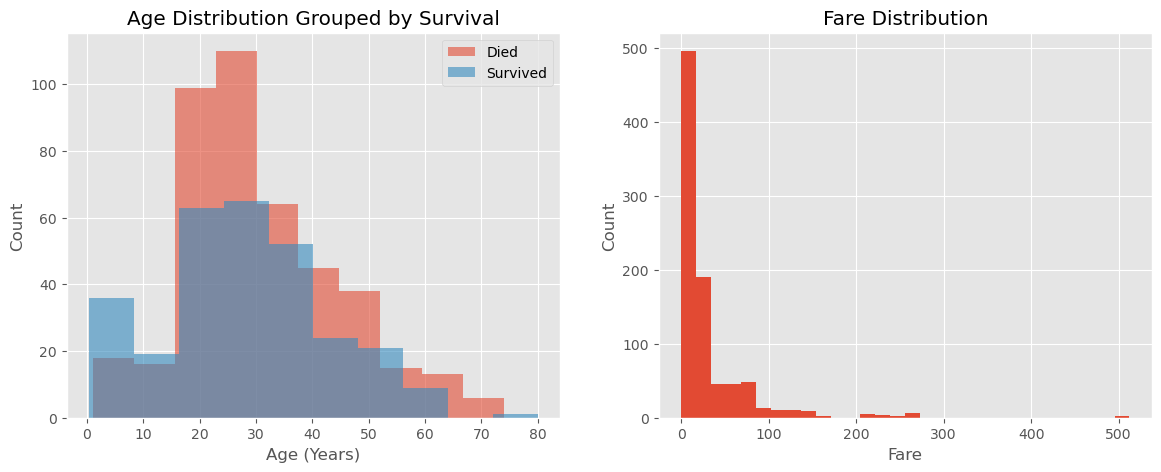

In [38]:
# Histograms of Age and Fare
plt.style.use('ggplot') # Set a nice plotting style
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age Histogram grouped by Survival
df[df['Survived'] == 0]['Age'].hist(ax=axes[0], alpha=0.6, label='Died')
df[df['Survived'] == 1]['Age'].hist(ax=axes[0], alpha=0.6, label='Survived')
axes[0].set_title('Age Distribution Grouped by Survival')
axes[0].set_xlabel('Age (Years)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Fare Histogram
df['Fare'].hist(ax=axes[1], bins=30)
axes[1].set_title('Fare Distribution')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Count')

plt.show()

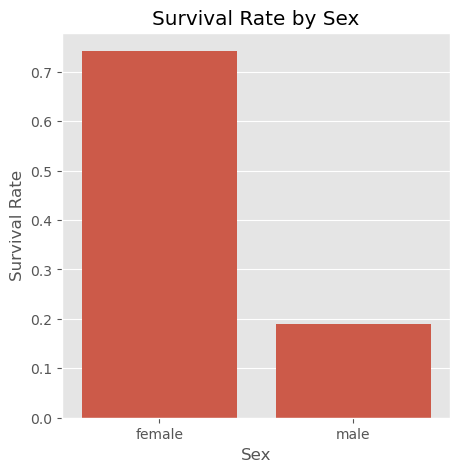

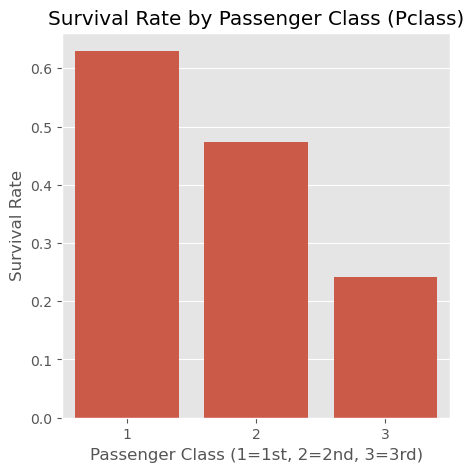

In [39]:
# Bar charts for survival rate by Sex and Pclass.
plt.style.use('ggplot') # Set a nice plotting style

# survival rate by Sex
plt.figure(figsize=(5, 5))
sns.barplot(x='Sex', y='Survival_Rate', data=survival_by_sex)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# survival rate by Pclass
plt.figure(figsize=(5, 5))
sns.barplot(x='Pclass', y='Survival_Rate', data=survival_by_pclass)
plt.title('Survival Rate by Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.show()

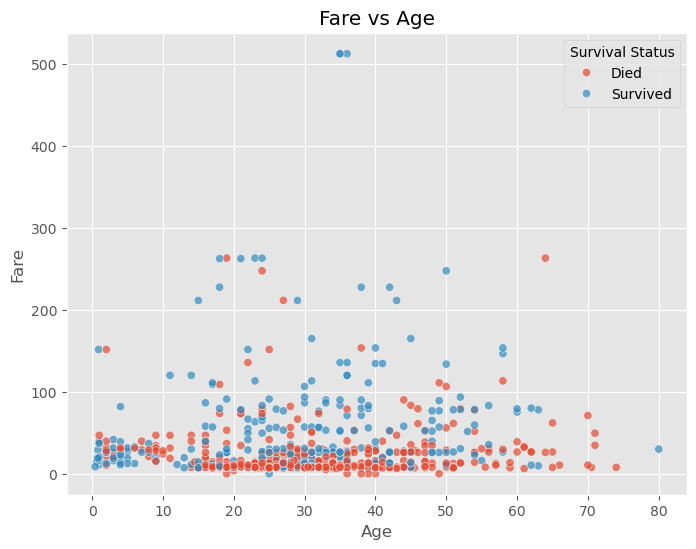

In [40]:
# Create a TEMPORARY copy of the Survived column with string labels
df['Survival_Status'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

# Use the new, clearly labeled column for the color (hue)
# Seaborn now creates a perfect legend automatically.
sns.scatterplot(x='Age', y='Fare', hue='Survival_Status', data=df, alpha=0.7)

# Now, you only need to set the legend title. No need to manually specify labels.
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survival Status') # The labels are now derived from the 'Survival_Status' column

plt.show()

# Optional: Drop the temporary column if you don't need it later
df.drop('Survival_Status', axis=1, inplace=True)

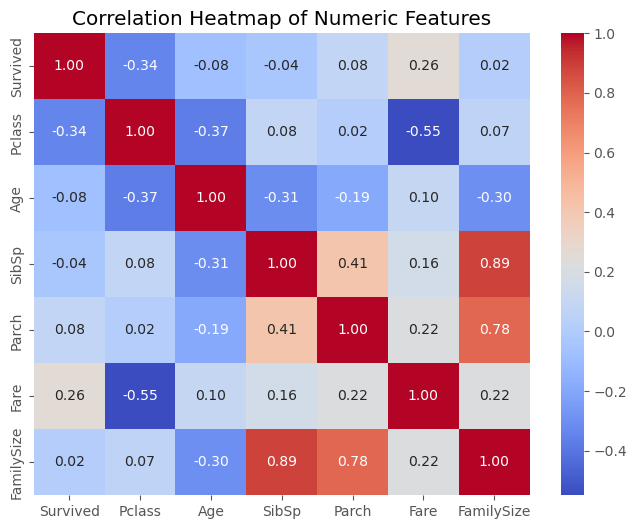

In [41]:
# Heatmap for Correlations
plt.figure(figsize=(8, 6))
# Select only numeric columns for the correlation matrix
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### LLM Interaction

In [43]:
import pandas as pd
# Assume 'df' is your final cleaned and feature-engineered DataFrame

def create_llm_summary_df(dataframe):
    """
    Groups data by Sex and Pclass to calculate key survival metrics for LLM analysis.
    """
    # Group by both categorical variables
    summary = dataframe.groupby(['Sex', 'Pclass'], observed=False).agg(
        Survival_Rate=('Survived', 'mean'),  # Calculate mean survival
        Total_Passengers=('Survived', 'count'),  # Count total passengers
        Avg_Age=('Age', 'mean'),  # Calculate average age
        Avg_Fare=('Fare', 'mean') # Calculate average fare
    ).reset_index()

    # Sort to easily identify the highest and lowest survival rates
    summary = summary.sort_values(by='Survival_Rate', ascending=False)
    return summary

llm_summary_df = create_llm_summary_df(df)
llm_summary_df

,Sex,Pclass,Survival_Rate,Total_Passengers,Avg_Age,Avg_Fare
0,female,1,0.968085,94,34.611765,106.125798
1,female,2,0.921053,76,28.722973,21.970121
2,female,3,0.500000,144,21.750000,16.118810
3,male,1,0.368852,122,41.281386,67.226127
4,male,2,0.157407,108,30.740707,19.741782
5,male,3,0.135447,347,26.507589,12.661633


In [ ]:
import openai
import os

# Set up OpenAI API
OPENAI_API_KEY = os.getenv("API-KEY-HERE")
if not OPENAI_API_KEY:
    OPENAI_API_KEY = "API-KEY-HERE"

client = openai.OpenAI(api_key=OPENAI_API_KEY)

# Function to process multiple user questions
def process_multiple_questions(user_questions):
    for i, question in enumerate(user_questions):
        print(f"\n🔍 Question {i+1}: {question}")

        prompt = f"""You are a data analyst.
        Please provide a concise, natural-language report summarizing the findings 
        based on the summary table of Titanic passenger data:

{llm_summary_df}

Answer the following question based on the analysis, table, and the data from the files: {question}
"""

        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a helpful data analyst."},
                {"role": "user", "content": prompt}
            ]
        )

        print("\nLLM Insight:\n", response.choices[0].message.content)

# user input
num_questions = int(input("Enter number of questions: "))
user_questions = [input(f"Enter question {i+1}: ") for i in range(num_questions)]

# Process all questions
process_multiple_questions(user_questions)

Enter number of questions:  3
Enter question 1:  Summarize which factors most influenced survival
Enter question 2:  Explain why children might have had higher survival rates than adults
Enter question 3:  Suggest one feature I could create that might improve insights about survival



🔍 Question 1: Summarize which factors most influenced survival

LLM Insight:
 Based on the summary table of Titanic passenger data, several factors appear to significantly influence survival rates:

1. **Sex**: Gender plays a substantial role in survival likelihood, with females having a much higher survival rate across all passenger classes compared to males. Female passengers in first and second class exhibit the highest survival rates at 96.8% and 92.1%, respectively, whereas male passengers have significantly lower survival rates, particularly in the second and third class at 15.7% and 13.5%, respectively.

2. **Passenger Class (Pclass)**: Passenger class impacts survival rates, with higher classes associated with better survival outcomes. First-class passengers have higher survival rates compared to those in second and third class, regardless of gender. For example, first-class females have a 96.8% survival rate, while third-class females have a 50% survival rate. Similarly, firs